In [79]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
import pandas as pd
from spacy.matcher import Matcher 
from spacy.tokens import Span 
from tqdm import tqdm
import wikipedia
import wikipediaapi
import re
import networkx as nx
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/amrit/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/amrit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [80]:
def get_entities(sent):
 
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    
  prv_tok_text = ""   

  prefix = ""
  modifier = ""
  
  for tok in nlp(sent):
    if tok.dep_ != "punct":
      if tok.dep_ == "compound":
        prefix = tok.text
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
 

  return [ent1.strip(), ent2.strip()]

In [81]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"},] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1
  if(k>0):
    span = doc[matches[k][1]:matches[k][2]] 
    return(span.text)
  

In [107]:
sent="How did michael jackson die from"
verb=get_relation(sent)
actors=get_entities(sent)
whwords = ['what', 'which', 'how', 'why', 'when', 'where', 'who']

In [108]:
verb

'die from'

In [109]:
concept=""
if(actors[0] in whwords):
    concept=actors[1]
else:
    concept=actors[0]
concept

'How michael jackson'

In [110]:
search_results=wikipedia.search(concept, results=3)
wiki_wiki = wikipediaapi.Wikipedia(language='en',extract_format=wikipediaapi.ExtractFormat.WIKI)
p_wiki = wiki_wiki.page(search_results[0])
text_data=p_wiki.text

In [111]:
li=text_data.split(".")
li[10:15]

[' At the 1984 Grammy Awards, Thriller won a record-breaking eight Grammy Awards, including Album of the Year',
 ' Jackson continued to innovate with videos including "Leave Me Alone" and "Smooth Criminal" from Bad (1987), "Black or White" and "Remember the Time" from Dangerous (1991), "Scream" from HIStory: Past, Present and Future, Book I (1995) and "Ghosts" from the remix album Blood on the Dance Floor: HIStory in the Mix (1997)',
 ' With songs such as "Man in the Mirror", "Black or White", "Heal the World", "Earth Song" and "They Don\'t Care About Us", Jackson\'s music emphasized racial integration, environmentalism and fighting against prejudice and injustice',
 ' \nStarting in the late 1980s, Jackson became a figure of controversy and speculation due to his changing appearance, relationships, behavior and lifestyle',
 ' In 1993, he was accused of sexually abusing the child of a family friend']

In [112]:
sentences = []
for i in li:
    l = i.split('.')
    for j in l:
        sentences.append(j)
sentences[10:15]

[' At the 1984 Grammy Awards, Thriller won a record-breaking eight Grammy Awards, including Album of the Year',
 ' Jackson continued to innovate with videos including "Leave Me Alone" and "Smooth Criminal" from Bad (1987), "Black or White" and "Remember the Time" from Dangerous (1991), "Scream" from HIStory: Past, Present and Future, Book I (1995) and "Ghosts" from the remix album Blood on the Dance Floor: HIStory in the Mix (1997)',
 ' With songs such as "Man in the Mirror", "Black or White", "Heal the World", "Earth Song" and "They Don\'t Care About Us", Jackson\'s music emphasized racial integration, environmentalism and fighting against prejudice and injustice',
 ' \nStarting in the late 1980s, Jackson became a figure of controversy and speculation due to his changing appearance, relationships, behavior and lifestyle',
 ' In 1993, he was accused of sexually abusing the child of a family friend']

In [113]:
filtered_sentences=[]
for sentence in sentences:
    count = 0
    for words in sentence:
        if(words==" "):
            count = count+1
    if(count>=3):
        filtered_sentences.append(sentence)
filtered_sentences[10:15]

[' At the 1984 Grammy Awards, Thriller won a record-breaking eight Grammy Awards, including Album of the Year',
 ' Jackson continued to innovate with videos including "Leave Me Alone" and "Smooth Criminal" from Bad (1987), "Black or White" and "Remember the Time" from Dangerous (1991), "Scream" from HIStory: Past, Present and Future, Book I (1995) and "Ghosts" from the remix album Blood on the Dance Floor: HIStory in the Mix (1997)',
 ' With songs such as "Man in the Mirror", "Black or White", "Heal the World", "Earth Song" and "They Don\'t Care About Us", Jackson\'s music emphasized racial integration, environmentalism and fighting against prejudice and injustice',
 ' \nStarting in the late 1980s, Jackson became a figure of controversy and speculation due to his changing appearance, relationships, behavior and lifestyle',
 ' In 1993, he was accused of sexually abusing the child of a family friend']

In [114]:
sentences=filtered_sentences
for val in range(len(sentences)):
    sentences[val]=re.sub("\[(.*?)\]","",sentences[val])
sentences[10:15]

[' At the 1984 Grammy Awards, Thriller won a record-breaking eight Grammy Awards, including Album of the Year',
 ' Jackson continued to innovate with videos including "Leave Me Alone" and "Smooth Criminal" from Bad (1987), "Black or White" and "Remember the Time" from Dangerous (1991), "Scream" from HIStory: Past, Present and Future, Book I (1995) and "Ghosts" from the remix album Blood on the Dance Floor: HIStory in the Mix (1997)',
 ' With songs such as "Man in the Mirror", "Black or White", "Heal the World", "Earth Song" and "They Don\'t Care About Us", Jackson\'s music emphasized racial integration, environmentalism and fighting against prejudice and injustice',
 ' \nStarting in the late 1980s, Jackson became a figure of controversy and speculation due to his changing appearance, relationships, behavior and lifestyle',
 ' In 1993, he was accused of sexually abusing the child of a family friend']

In [115]:
df=pd.DataFrame(sentences)
df.head()

,0
0,"Michael Joseph Jackson (August 29, 1958 – June 25, 2009) was an American singer, songwriter, and dancer"
1,"Dubbed the ""King of Pop"", he is regarded as one of the most significant cultural figures of the 20th century and one of the greatest entertainers in the history of music"
2,"Through stage and video performances, he popularized complicated dance techniques such as the moonwalk, to which he gave the name"
3,His sound and style have influenced artists of various genres
4,"Jackson's contributions to music, dance, and fashion, along with his publicized personal life, made him a global figure in popular culture for over four decades"


In [116]:
df['sentence']=df[0]
df=df.drop([0],axis=1)
df.head()

,sentence
0,"Michael Joseph Jackson (August 29, 1958 – June 25, 2009) was an American singer, songwriter, and dancer"
1,"Dubbed the ""King of Pop"", he is regarded as one of the most significant cultural figures of the 20th century and one of the greatest entertainers in the history of music"
2,"Through stage and video performances, he popularized complicated dance techniques such as the moonwalk, to which he gave the name"
3,His sound and style have influenced artists of various genres
4,"Jackson's contributions to music, dance, and fashion, along with his publicized personal life, made him a global figure in popular culture for over four decades"


In [117]:
candidate_sentences=df
candidate_sentences['sentence'].sample(5)

221    In March 1988, Jackson purchased 2,700 acres (11 km2) of land near Santa Ynez, California, to build a new home, Neverland Ranch, at a cost of $17 million
375                                                                                            Jackson found the experience stressful and it affected his health
64                                                                     "The Jackson 5 were later described as "a cutting-edge example of black crossover artists
635                                                                                              It won an NAACP Image Award for Outstanding Music Video in 2002
667                                                                    The executors claim that it was worth about $7 million, the IRS that it was worth over $1
Name: sentence, dtype: object

In [118]:
entity_pairs = []
for i in tqdm(candidate_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 675/675 [00:04<00:00, 140.69it/s]


In [119]:
entity_pairs[:5]

[['Michael Joseph Jackson', ''],
 ['he', 'greatest  music'],
 ['such dance he', 'name'],
 ['sound', 'various  genres'],
 ['personal  him', 'four  decades']]

In [120]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

100%|██████████| 675/675 [00:04<00:00, 139.56it/s]


In [121]:
pd.Series(relations).value_counts()[:50]

performed at               5
released on                4
returned to                4
Classical                  3
released                   2
honored with               2
emphasized racial          2
million of                 2
moved to                   2
accused of                 2
climbed to                 2
led to                     2
debuted at                 2
settled out                2
Give                       2
released in                2
referred to                2
Be                         2
Get Enough                 2
honored as                 2
died from                  2
team for                   2
dancer with                2
Is                         2
aired on                   2
brought underprivileged    1
disrupted by               1
's                         1
filed by                   1
been medium                1
dealt with                 1
premiered at               1
peaked at                  1
partnered with             1
ended little  

In [122]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})


In [123]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

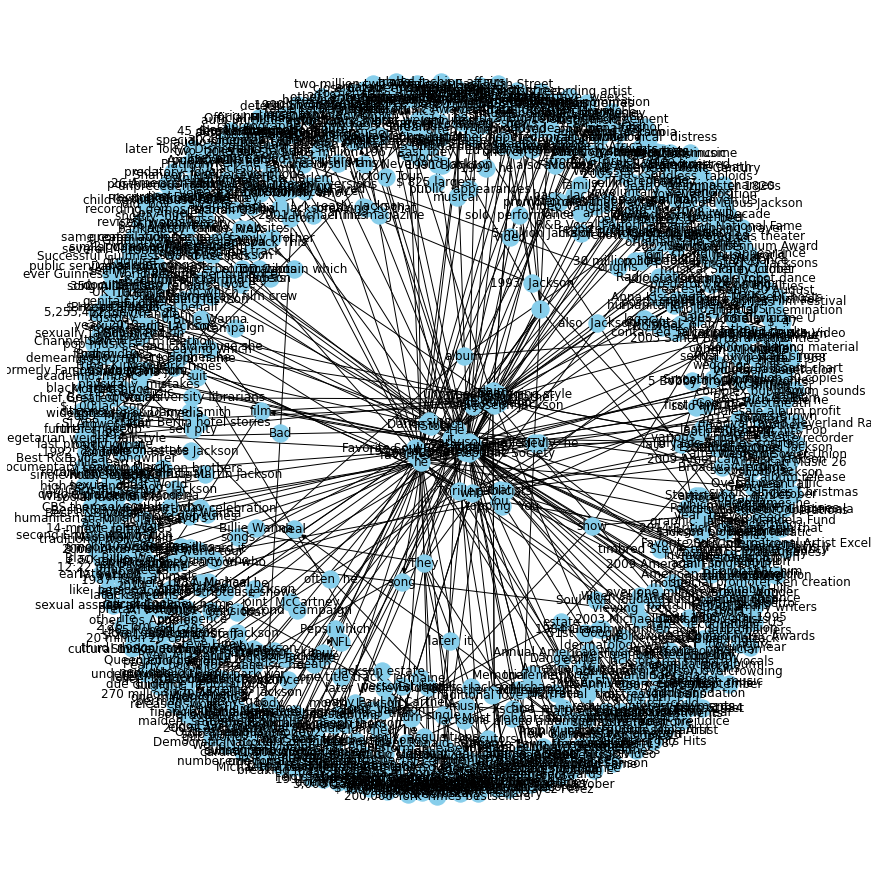

In [124]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

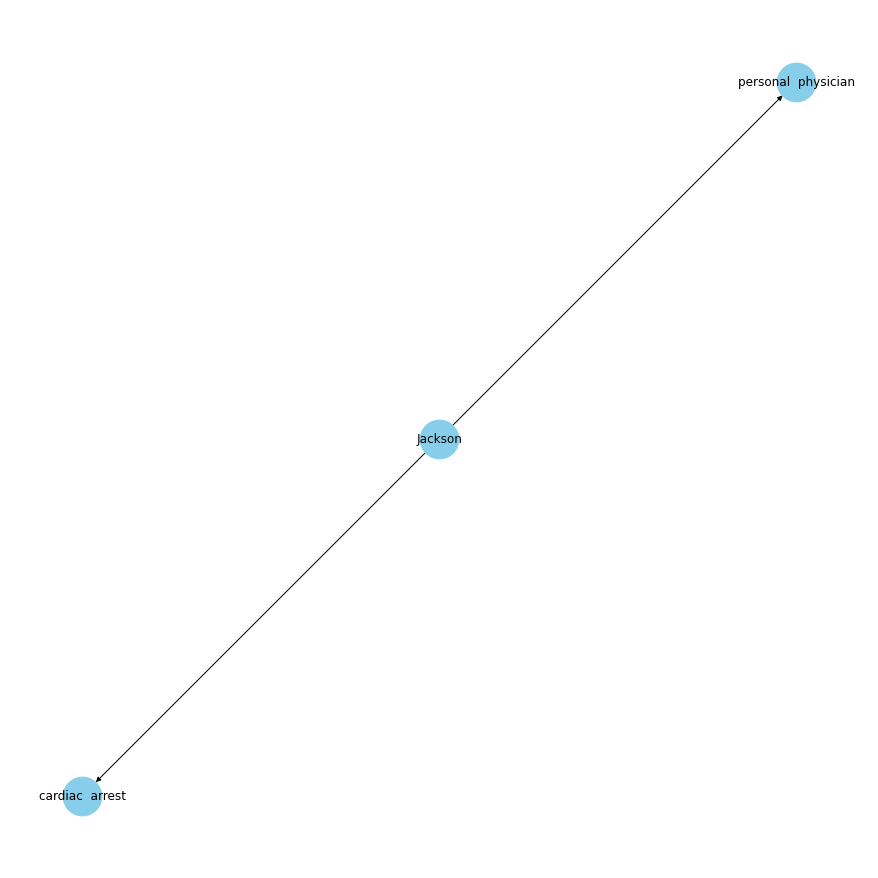

In [125]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="died from"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [126]:
kg_df.head()

,source,target,edge
0,Michael Joseph Jackson,,None
1,he,greatest music,regarded as
2,such dance he,name,popularized complicated
3,sound,various genres,None
4,personal him,four decades,None


In [131]:
tokens=nltk.pos_tag(verb.split(" "))
nominees=[]
for i in tokens:
    if(i[1]!='IN'):
        nominees.append(i[0])

checks=set()
for i in nominees:    
    syns = wordnet.synsets(i)
    for j in syns:
        checks.add(j.lemmas()[0].name())
checks=list(checks)
checks

['die', 'fail']

In [132]:
suspect_relations=set()
for j in checks:
    for i in kg_df['edge']:
        if(i and j in i):
            suspect_relations.add(i)
suspect_relations

{'died from'}

In [133]:
for i in suspect_relations:
    print(kg_df[kg_df['edge']==i])

      source               target       edge
17   Jackson  personal  physician  died from
422  Jackson      cardiac  arrest  died from
